In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "combined_dataset.csv"
df = pd.read_csv(file_path)

# Step 1: Handle missing values (drop rows with missing values)
df.dropna(inplace=True)

# Step 2: Standardize column names (replace special characters with underscores)
df.columns = df.columns.str.replace(r'\W+', '_', regex=True)

# Step 3: Convert numerical columns to integers (excluding target column)
numerical_cols = df.columns[:-1]  # All except the last column "Disorder"
df[numerical_cols] = df[numerical_cols].astype(int)

# Step 4: Encode categorical target variable
label_encoder = LabelEncoder()
df["Disorder"] = label_encoder.fit_transform(df["Disorder"])



In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter

import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats as st

from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
from imblearn.over_sampling import SMOTE


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687 entries, 0 to 686
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          687 non-null    int64
 1   feeling_nervous              687 non-null    int64
 2   panic                        687 non-null    int64
 3   breathing_rapidly            687 non-null    int64
 4   sweating                     687 non-null    int64
 5   trouble_in_concentration     687 non-null    int64
 6   having_trouble_in_sleeping   687 non-null    int64
 7   having_trouble_with_work     687 non-null    int64
 8   hopelessness                 687 non-null    int64
 9   anger                        687 non-null    int64
 10  over_react                   687 non-null    int64
 11  change_in_eating             687 non-null    int64
 12  suicidal_thought             687 non-null    int64
 13  feeling_tired                687 non-null    int64

In [4]:
X=df.iloc[:,0:28]

In [5]:
y=df.iloc[:,28]

In [6]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [34]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))  # Shows class distribution


{np.int64(0): np.int64(65), np.int64(1): np.int64(89), np.int64(2): np.int64(45), np.int64(3): np.int64(65), np.int64(4): np.int64(50), np.int64(5): np.int64(31), np.int64(6): np.int64(60), np.int64(7): np.int64(46), np.int64(8): np.int64(67), np.int64(9): np.int64(43), np.int64(10): np.int64(65), np.int64(11): np.int64(27), np.int64(12): np.int64(34)}


In [35]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

rf = RandomForestClassifier(class_weight="balanced", random_state=42)
param_grid = {
 'bootstrap': [True],
 'max_depth': [80, 90, 100, 110],
 'max_features': [2, 3],
 'min_samples_leaf': [3, 4, 5],
 'min_samples_split': [8, 10, 12],
 'n_estimators': [100, 200, 300, 1000]
}
rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid,
 cv = 5, n_jobs = -1, verbose = 2)
rfclassifier.fit(x_train, y_train)
rfclassifier.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [36]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = rfclassifier.predict(x_test)
y_proba = rfclassifier.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  4  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.83      1.00      0.90        19
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       1.00      0.69      0.82        13
           7       1



Accuracy: 0.97
Precision: 0.98
Recall: 0.97
Jaccard Score: 0.95
AUC: 1.0


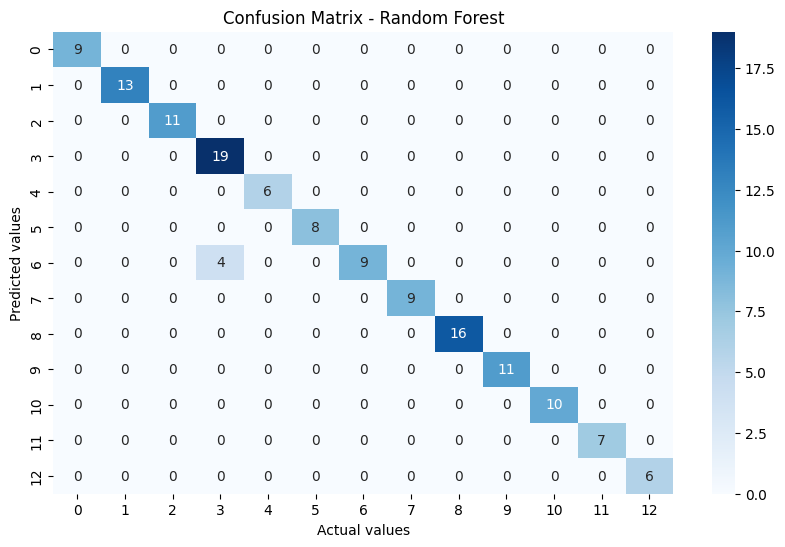

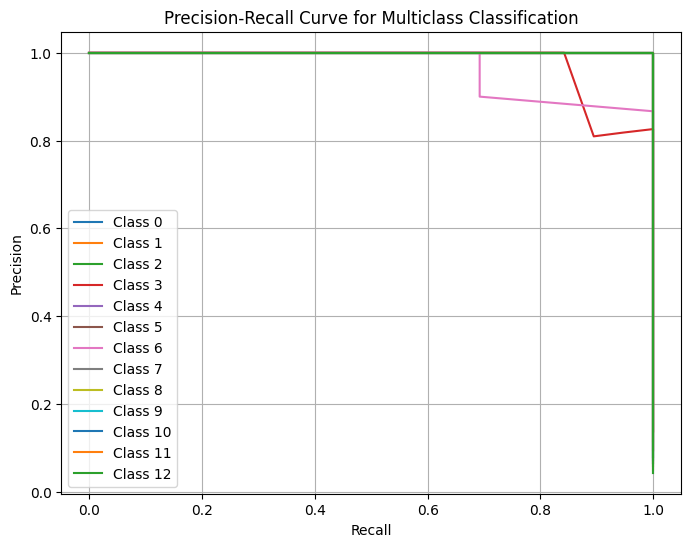

Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique classes in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Log Loss: 0.17279326886771645
Matthews Correlation Coefficient: 0.969126996560457
Hamming Loss: 0.028985507246376812


In [37]:
import seaborn as sns
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import (
    hamming_loss, jaccard_score, log_loss, matthews_corrcoef,
    roc_auc_score, confusion_matrix, classification_report,
    precision_score, recall_score, accuracy_score, f1_score
)

print('\n')
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred, average="weighted"), 2)
recall = round(recall_score(y_test, y_pred, average="weighted"), 2)
jaccard = round(jaccard_score(y_test, y_pred, average="weighted"), 2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Jaccard Score:", jaccard)

# AUC Score (One-vs-Rest)
# Get all possible class labels
classes = np.unique(y_train)  # Ensure all classes are included

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute AUC correctly
auc = roc_auc_score(y_test_binarized, y_proba, average="weighted", multi_class="ovr")
print('AUC:', round(auc, 2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title("Confusion Matrix - Random Forest")
plt.savefig("Confusion_Matrix_RF.png", dpi=800, bbox_inches="tight")
plt.show()

# Precision-Recall Curve for Multiclass
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
for i in range(len(set(y_test))):  # Loop through each class
    precision, recall, _ = precision_recall_curve(y_test == i, y_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve for Multiclass Classification")
plt.grid()
plt.savefig("PR_curve_multiclass_RF.png", dpi=800, bbox_inches="tight")
plt.show()
import numpy as np
from sklearn.metrics import log_loss

# Get unique classes from training set
classes = np.unique(y_train)

# Ensure y_test has the same number of classes
print("Unique classes in y_train:", classes)
print("Unique classes in y_test:", np.unique(y_test))

# Compute log loss with explicit class labels
print("Log Loss:", log_loss(y_test, y_proba, labels=classes))
# Matthews Correlation Coefficient
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

# Hamming Loss
print("Hamming Loss:", hamming_loss(y_test, y_pred))


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'penalty': ['l2'],  # 'l1' can only be used with 'saga'
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['lbfgs', 'saga'],  # Compatible solvers for multinomial logistic regression
    'multi_class': ['multinomial']  # Enables proper handling of multiclass problems
}

# Create a Logistic Regression model
lr = LogisticRegression(class_weight="balanced")

# Instantiate GridSearchCV
lrClassifier = GridSearchCV(estimator=lr, param_grid=param_grid,
                            cv=3, n_jobs=-1, verbose=2)

# Fit model
lrClassifier.fit(x_train, y_train)

# Get best parameters
print("Best Parameters:", lrClassifier.best_params_)


Fitting 3 folds for each of 14 candidates, totalling 42 fits
Best Parameters: {'C': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'lbfgs'}


[[ 9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       1.00      0.89      0.94        19
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8
           6       0.87      1.00      0.93        13
           7       1

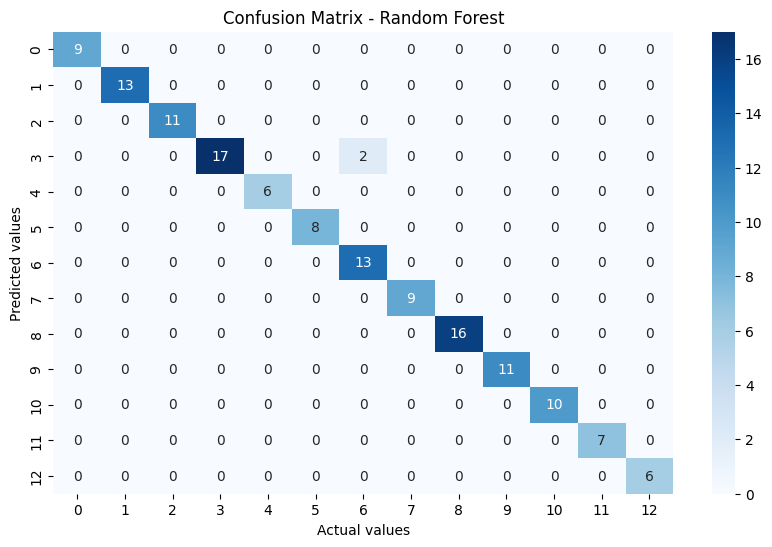

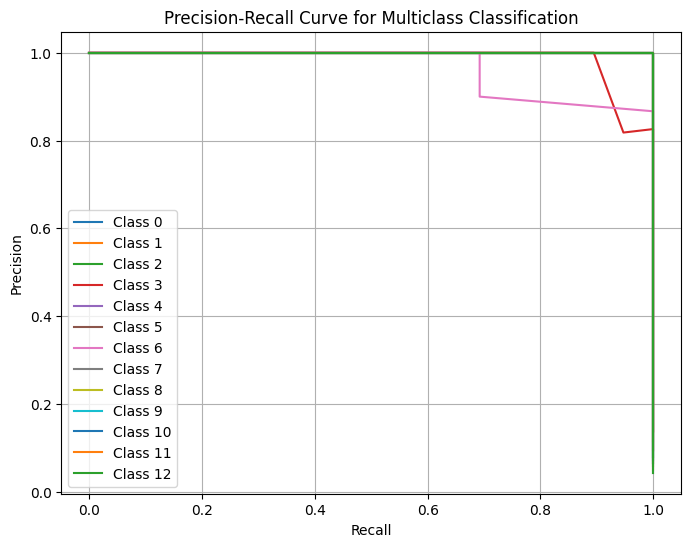

Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique classes in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Log Loss: 0.044223452864263914
Matthews Correlation Coefficient: 0.9843751039472171
Hamming Loss: 0.014492753623188406


In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
import seaborn as sns
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import (
    hamming_loss, jaccard_score, log_loss, matthews_corrcoef,
    roc_auc_score, confusion_matrix, classification_report,
    precision_score, recall_score, accuracy_score, f1_score
)

print('\n')
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred, average="weighted"), 2)
recall = round(recall_score(y_test, y_pred, average="weighted"), 2)
jaccard = round(jaccard_score(y_test, y_pred, average="weighted"), 2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Jaccard Score:", jaccard)

# AUC Score (One-vs-Rest)
# Get all possible class labels
classes = np.unique(y_train)  # Ensure all classes are included

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute AUC correctly
auc = roc_auc_score(y_test_binarized, y_proba, average="weighted", multi_class="ovr")
print('AUC:', round(auc, 2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title("Confusion Matrix - Random Forest")
plt.savefig("Confusion_Matrix_RF.png", dpi=800, bbox_inches="tight")
plt.show()

# Precision-Recall Curve for Multiclass
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
for i in range(len(set(y_test))):  # Loop through each class
    precision, recall, _ = precision_recall_curve(y_test == i, y_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve for Multiclass Classification")
plt.grid()
plt.savefig("PR_curve_multiclass_RF.png", dpi=800, bbox_inches="tight")
plt.show()
import numpy as np
from sklearn.metrics import log_loss

# Get unique classes from training set
classes = np.unique(y_train)

# Ensure y_test has the same number of classes
print("Unique classes in y_train:", classes)
print("Unique classes in y_test:", np.unique(y_test))

# Compute log loss with explicit class labels
print("Log Loss:", log_loss(y_test, y_proba, labels=classes))
# Matthews Correlation Coefficient
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

# Hamming Loss
print("Hamming Loss:", hamming_loss(y_test, y_pred))


In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, jaccard_score,
    log_loss, matthews_corrcoef, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, classification_report
)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import PrecisionRecallDisplay

# Define hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 10, 20, 30, 50, 70, 100],  # Reduced for efficiency
    'min_samples_split': range(10, 500, 50),  # Step increased to reduce computation time
    'splitter': ['best', 'random'],
    'min_samples_leaf': [1, 5, 10, 15],
    'max_features': ['log2', 'sqrt', 'auto']
}

# Initialize Decision Tree Model
dt = DecisionTreeClassifier(random_state=42,class_weight="balanced")

# Grid Search with 3-Fold Cross Validation
dtClassifier = GridSearchCV(estimator=dt, param_grid=param_grid,
                            cv=3, n_jobs=-1, verbose=2)
dtClassifier.fit(x_train, y_train)

# Get best hyperparameters
print("Best Parameters:", dtClassifier.best_params_)



Fitting 3 folds for each of 3840 candidates, totalling 11520 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


[[ 9  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 11  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 13  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.89      0.89      0.89        19
           4       1.00      0.67      0.80         6
           5       1.00      1.00      1.00         8
           6       0.87      1.00      0.93        13
           7       0

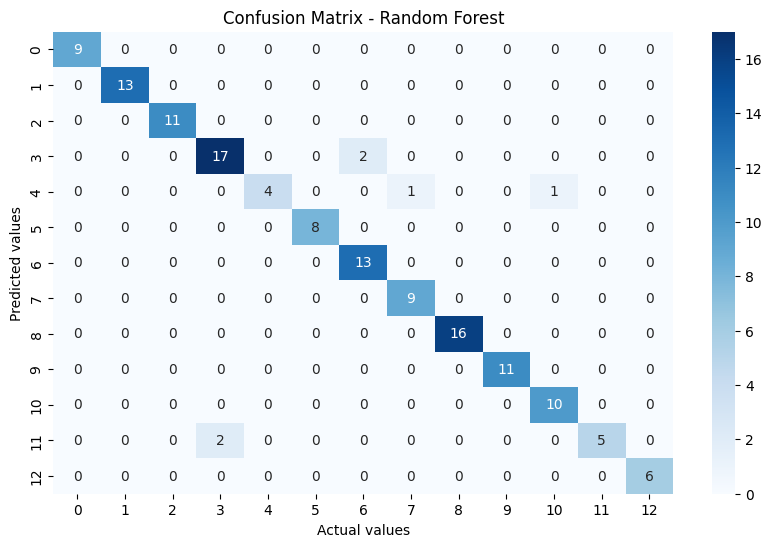

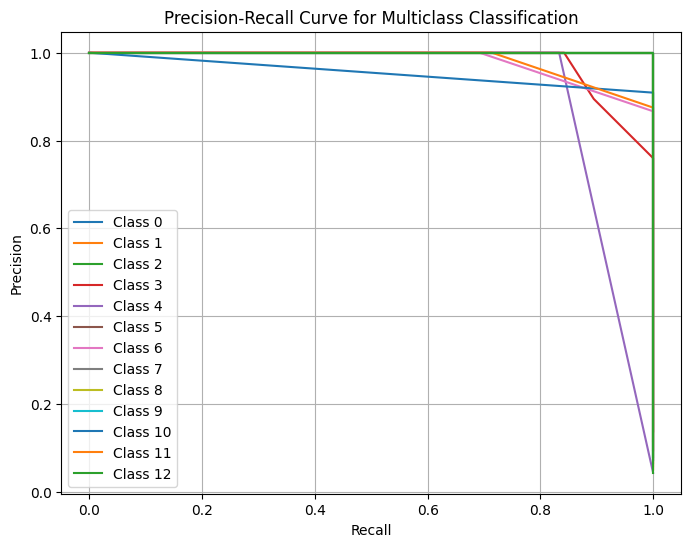

Unique classes in y_train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Unique classes in y_test: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Log Loss: 0.31250397448555345
Matthews Correlation Coefficient: 0.9527465485830519
Hamming Loss: 0.043478260869565216


In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = dtClassifier.predict(x_test)
y_proba = dtClassifier.predict_proba(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
import seaborn as sns
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import (
    hamming_loss, jaccard_score, log_loss, matthews_corrcoef,
    roc_auc_score, confusion_matrix, classification_report,
    precision_score, recall_score, accuracy_score, f1_score
)

print('\n')
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred, average="weighted"), 2)
recall = round(recall_score(y_test, y_pred, average="weighted"), 2)
jaccard = round(jaccard_score(y_test, y_pred, average="weighted"), 2)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Jaccard Score:", jaccard)

# AUC Score (One-vs-Rest)
# Get all possible class labels
classes = np.unique(y_train)  # Ensure all classes are included

# Binarize y_test
y_test_binarized = label_binarize(y_test, classes=classes)

# Compute AUC correctly
auc = roc_auc_score(y_test_binarized, y_proba, average="weighted", multi_class="ovr")
print('AUC:', round(auc, 2))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title("Confusion Matrix - Random Forest")
plt.savefig("Confusion_Matrix_RF.png", dpi=800, bbox_inches="tight")
plt.show()

# Precision-Recall Curve for Multiclass
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(8,6))
for i in range(len(set(y_test))):  # Loop through each class
    precision, recall, _ = precision_recall_curve(y_test == i, y_proba[:, i])
    plt.plot(recall, precision, label=f'Class {i}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.title("Precision-Recall Curve for Multiclass Classification")
plt.grid()
plt.savefig("PR_curve_multiclass_RF.png", dpi=800, bbox_inches="tight")
plt.show()
import numpy as np
from sklearn.metrics import log_loss

# Get unique classes from training set
classes = np.unique(y_train)

# Ensure y_test has the same number of classes
print("Unique classes in y_train:", classes)
print("Unique classes in y_test:", np.unique(y_test))

# Compute log loss with explicit class labels
print("Log Loss:", log_loss(y_test, y_proba, labels=classes))
# Matthews Correlation Coefficient
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

# Hamming Loss
print("Hamming Loss:", hamming_loss(y_test, y_pred))


In [42]:
import shap
explainer = shap.Explainer(rfclassifier.predict, x_train)
shap_values = explainer(x_train)

PermutationExplainer explainer: 550it [18:59,  2.09s/it]


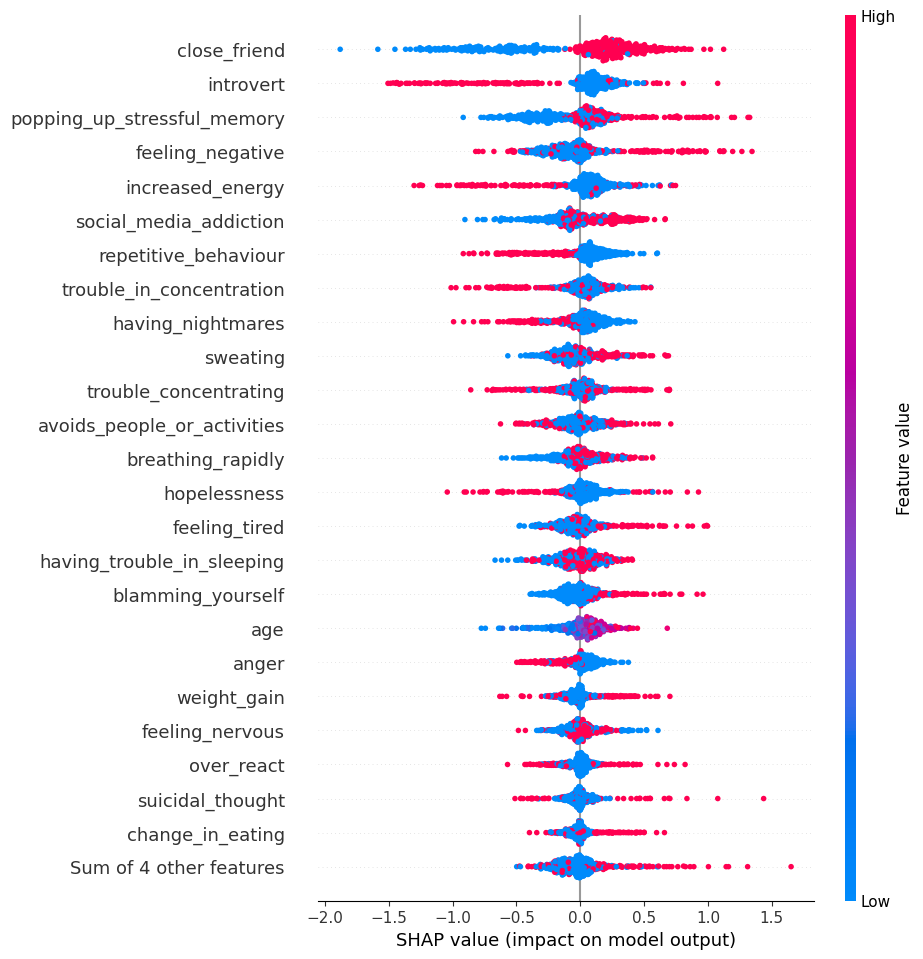

In [43]:
fig=plt.figure()
fig=shap.plots.beeswarm(shap_values, max_display=25,show=False)
plt.savefig("BeeSwarm1.png", dpi=700,bbox_inches = 'tight')
plt.show()

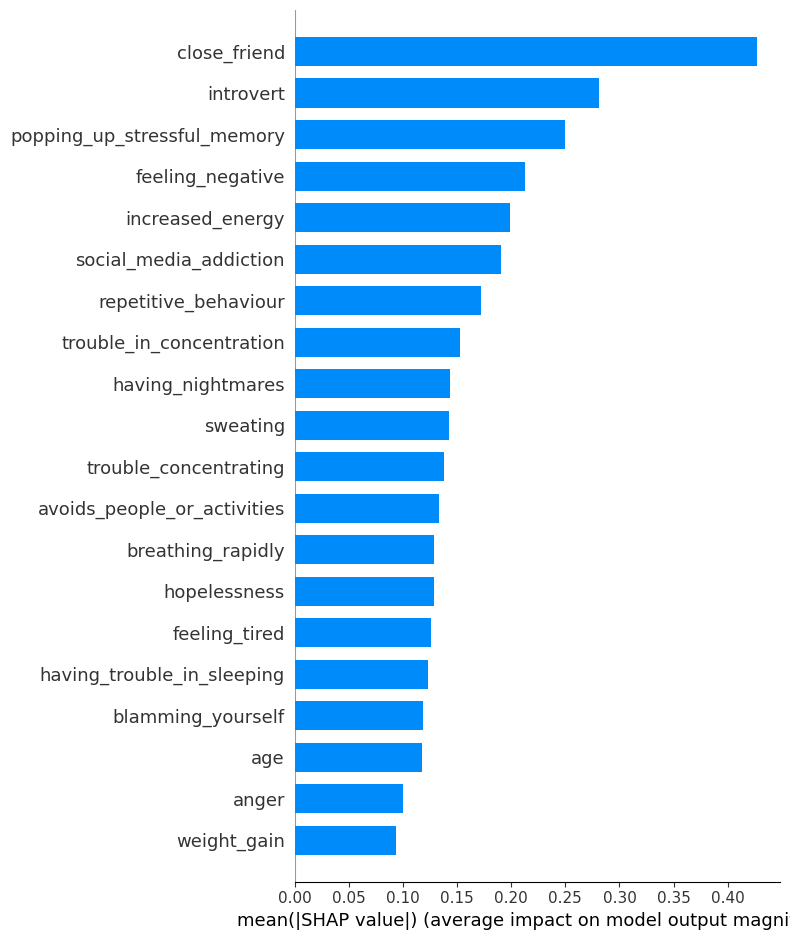

In [44]:
fig=shap.summary_plot(shap_values, x_train, plot_type="bar",show=False)
plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [46]:
pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8cb24247a3874b556eeb8f890050722d5584dc0b2963e9360f46f95b17d0deb1
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [47]:
import lime
from lime import lime_tabular
interpretor = lime_tabular.LimeTabularExplainer(
 training_data=np.array(x_train),
 feature_names=x_train.columns,
 mode='classification'
)

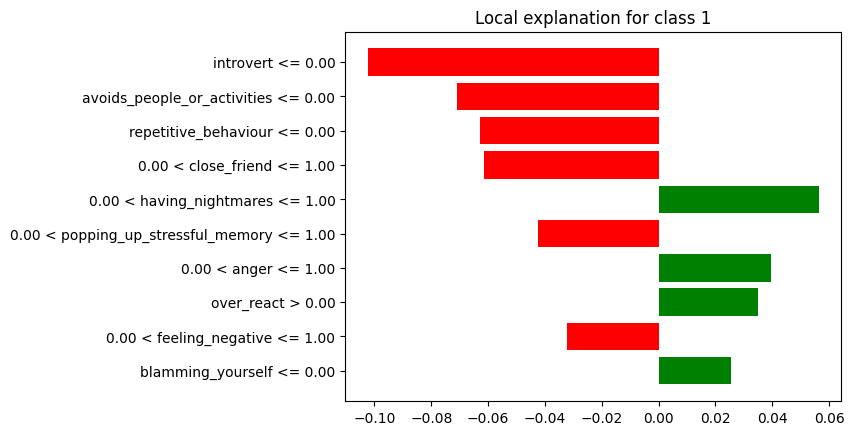

In [48]:
exp = interpretor.explain_instance(
 data_row=x_test.iloc[12], ##new data
 predict_fn=rfclassifier.predict_proba
)
exp.save_to_file('LIME1.html')
fig = exp.as_pyplot_figure()
fig.savefig('lime_report.png')
fig=exp.show_in_notebook(show_table=True)
plt.savefig("LIMESurvived.png", dpi=100,bbox_inches = 'tight')
plt.show()

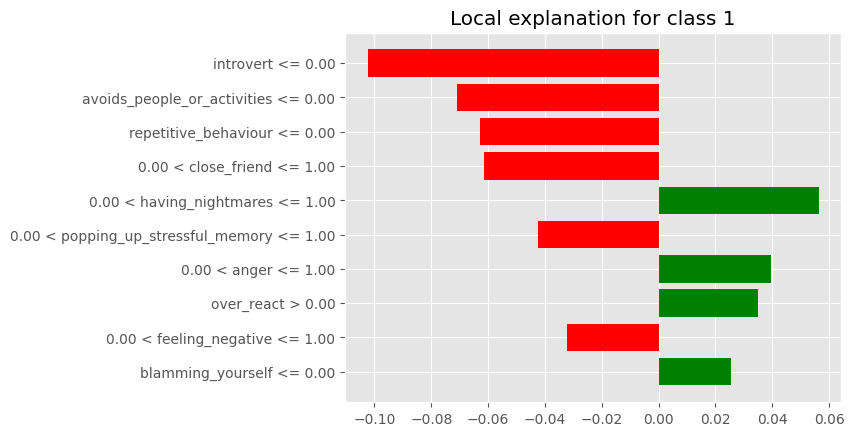

In [49]:
with plt.style.context("ggplot"):
 exp.as_pyplot_figure()
 plt.savefig("LIME1.png", dpi=600,bbox_inches = 'tight')

In [50]:
exp = interpretor.explain_instance(
 data_row=x_test.iloc[25], ##new data
 predict_fn=rfclassifier.predict_proba
)
fig=exp.show_in_notebook(show_table=True)

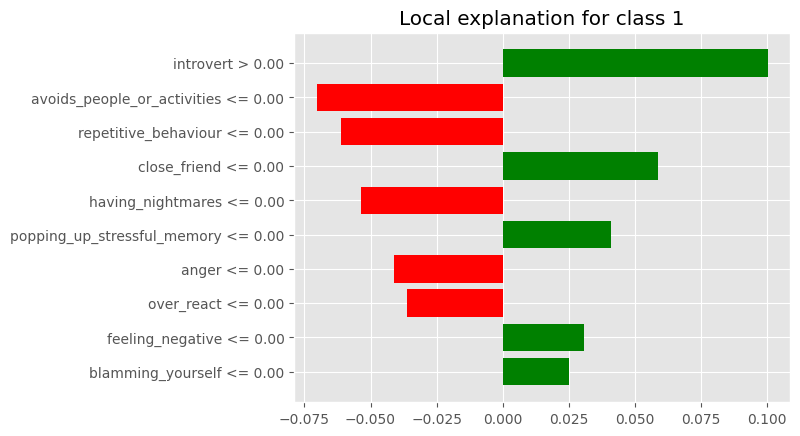

In [51]:
with plt.style.context("ggplot"):
 exp.as_pyplot_figure()
 plt.savefig("LIME2.png", dpi=600,bbox_inches = 'tight')

In [ ]:
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Target Variable Mapping:", label_mapping)

Target Variable Mapping: {'ADHD': 0, 'ASD': 1, 'Loneliness': 2, 'MDD': 3, 'Normal': 4, 'OCD': 5, 'PDD': 6, 'PTSD': 7, 'anxiety': 8, 'bipolar': 9, 'eating disorder': 10, 'psychotic depression': 11, 'sleeping disorder': 12}


In [ ]:
import numpy as np

# Define the attributes for user input
attributes = [
     "age", "feeling_nervous", "panic", "breathing_rapidly", "sweating", "trouble_in_concentration", "having_trouble_in_sleeping", "having_trouble_with_work", "hopelessness", "anger", "over_react", "change_in_eating", "suicidal_thought", "feeling_tired", "close_friend", "social_media_addiction", "weight_gain", "introvert", "popping_up_stressful_memory", "having_nightmares", "avoids_people_or_activities", "feeling_negative", "trouble_concentrating", "blamming_yourself", "hallucinations", "repetitive_behaviour", "seasonally", "increased_energy"
]

# Take user input
print("Enter values for the following attributes:")
user_input = []
for attr in attributes:
    value = float(input(f"{attr}: "))  # Convert input to float
    user_input.append(value)

# Convert input into a NumPy array and reshape it for model prediction
user_input_array = np.array(user_input).reshape(1, -1)

# Predict using the best model
best_model=lrClassifier
predicted_class = best_model.predict(user_input_array)

print("\nPredicted Target Variable:", predicted_class[0])


Enter values for the following attributes:
